## Regression

- 선형회귀란? 종속변수와 하나 이상의 설명변수(독립변수)간의 관계를 모델링하는 선형접근법

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

In [4]:
# 키와 몸무게
height =[[1.6],[1.65],[1.7],[1.77],[1.85]]
weight =[[60],[65],[70],[77],[85]]

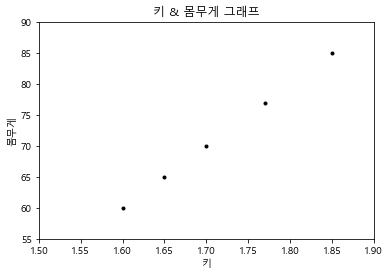

In [6]:
plt.title('키 & 몸무게 그래프')
plt.xlabel('키')
plt.ylabel('몸무게')

plt.plot(height,weight,'k.')
plt.axis([1.5,1.9,55,90])

plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [9]:
lr_model = LinearRegression()

# fit 함수는 리스트 또는 배열 형태의 인수를 필요로 한다
lr_model.fit(height,weight)

LinearRegression()

In [12]:
# 예측
weight_pred = lr_model.predict([[1.7],[1.75]]) # 2차원 배열이 들어감 -> 독립변수를 넣어줘야함
weight_pred

array([[70.],
       [75.]])

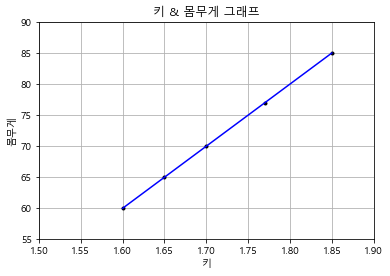

In [13]:
plt.title('키 & 몸무게 그래프')
plt.xlabel('키')
plt.ylabel('몸무게')
plt.grid(True)

plt.plot(height,weight,'k.')
plt.axis([1.5,1.9,55,90])

# 선형 회귀 선을 그린다
plt.plot(height,lr_model.predict(height),color='blue')

plt.show()

### auto-mpg.csv을 이용한 선형회귀

In [50]:
row_data = pd.read_csv('./data/auto-mpg.csv',header=None)
row_data.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

In [51]:
row_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [52]:
# 데이터 자료형 확인
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [53]:
row_data['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

- horsepower 전처리

- '?' -> np.nan 변경
- 행을 삭제
- 문자열을 실수형으로 변환

In [54]:
row_data[row_data['horsepower']=='?'] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [55]:
row_data['horsepower'].replace('?',np.nan,inplace=True)

In [56]:
row_data['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [57]:
row_data.dropna(subset=['horsepower'],axis=0,inplace=True) # horsepower에 nan가 있는 값만 제거하겠다
row_data['horsepower']=row_data['horsepower'].astype('float64')

In [58]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [59]:
# 분석에 활용할 변수를 선택
cor_df = row_data[['mpg','cylinders','horsepower','weight']]
cor_df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


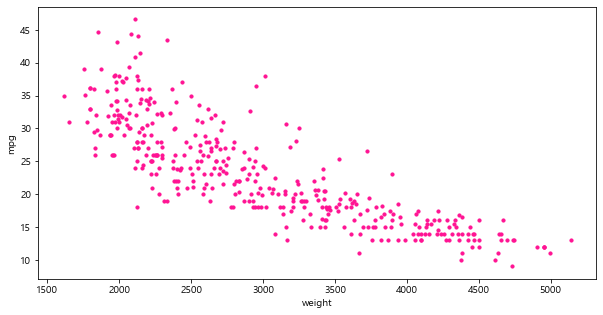

In [77]:
# 선형관계 파악을 위한 산점도 그래프
cor_df.plot(kind='scatter',x='weight',y='mpg',c='deeppink',s=10,figsize=(10,5))
plt.show()

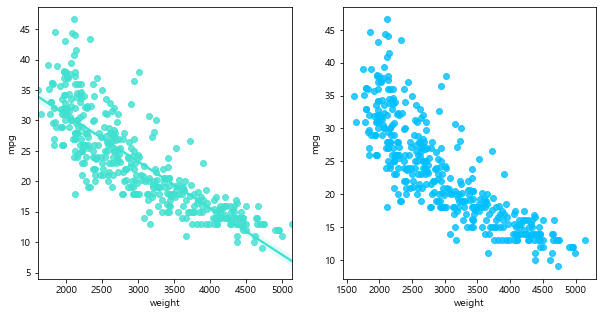

In [76]:
# Seaborn 산점도

fig = plt.figure(figsize=(10,5))
area01=fig.add_subplot(1,2,1)
area02=fig.add_subplot(1,2,2)

sns.regplot(x='weight',y='mpg',data=cor_df,ax=area01,color='turquoise')
sns.regplot(x='weight',y='mpg',data=cor_df,ax=area02,color='deepskyblue',fit_reg=False)
plt.show()




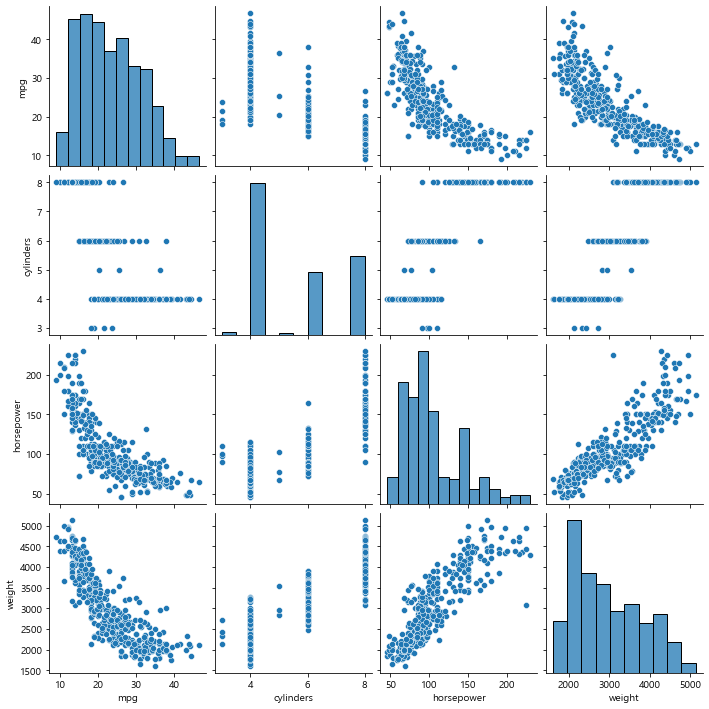

In [74]:
sns.pairplot(cor_df)
plt.show()

In [111]:
# X=cor_df[['weight']] # 독립변수 - 단일 선형회귀
X=cor_df[['weight','cylinders','horsepower']] # 독립변수 - 다중 선형회귀
y=cor_df['mpg'] # 종속변수

In [112]:
# 데이터 세트를 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print(len(X_train))
print(len(X_test))

313
79


In [113]:
from sklearn.linear_model import LinearRegression
auto_lr_model = LinearRegression()

In [114]:
auto_lr_model.fit(X_train,y_train)
r_square = auto_lr_model.score(X_test,y_test)
print('결정계수 : ',r_square )

결정계수 :  0.7114913212756986


In [115]:
# 회귀의 기울기
print('기울기 : ',auto_lr_model.coef_)
# 회귀의 절편
print('절편 : ',auto_lr_model.intercept_)

기울기 :  [-0.005262   -0.35376808 -0.04359149]
절편 :  45.707410007109324


In [116]:
# 모델에 전체 X 데이터를 입력하여 예측값, 실제 y 
y_pred = auto_lr_model.predict(X)

In [117]:
result_df=pd.DataFrame(data={'y_pred' :y_pred,
                  'y' : y})
result_df.head()

,y_pred,y
0,18.772324,18.0
1,16.252104,15.0
2,18.258310,18.0
3,18.274096,16.0
4,18.625819,17.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


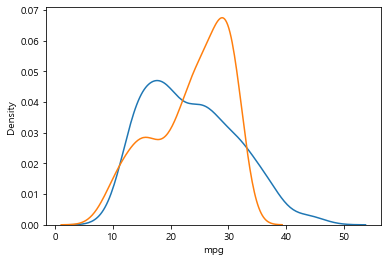

In [118]:
# 회귀분석 -> 전제 : 종속변수가 정규성을 따라야한다
sns.distplot(y,hist=False,label='answer')
sns.distplot(y_pred,hist=False,label='guess')
plt.show()

In [ ]:
# 가상환경 추가  : conda -n bingdataEnv python=3.6
# 가상환경 확인 : conda info --envs
# 가상환경 활성화 : conda activate bigdataEnv
# 주피터 커널 연결 : conda install jupyter notebook
# 텐서플로우 설치 : conda install tensorflow    ## 2.1 버전
# conda install numpy
# conda install pandas
# conda install seaborn
#-------------------------------------------------------------------------
# 가상환경 비활성화  : conda deactivate
# 가상환경 제거  : conda env remove -n bingdataEnv